Clasificación clientes riesgo crediticio

# Acerca del dataset


Contexto

Una compañía automotriz tiene planes de ingresar a nuevos mercados con sus productos existentes (P1, P2, P3, P4 y P5). Después de una intensa investigación de mercado, han deducido que el comportamiento del nuevo mercado es similar al de su mercado actual.

En su mercado actual, el equipo de ventas ha clasificado a todos los clientes en 4 segmentos (A, B, C, D). Luego, realizaron un alcance y comunicación segmentados para diferentes segmentos de clientes. Esta estrategia les ha funcionado excepcionalmente bien. Planean utilizar la misma estrategia para los nuevos mercados y han identificado 2627 nuevos clientes potenciales.

Se requiere que ayudes al gerente a predecir el grupo correcto de los nuevos clientes.

#Planteamiento de objetivos e hipótesis


#Features

Variables:

- ID: ID único
- Gender: Género del cliente
- Ever_Married: Estado marital del cliente
- Age: Edad del cliente
- Graduated: Si el cliente se graduó o no (Si/No)
- Profession: Profesión del cliente
- Work_Experience: Experience laboral (Años)
- Spending_Score: Spending score (scoring asignado en función del comportamiento del cliente y la naturaleza del gasto) del cliente
- Family_Size: Cantidad de miembros en la familia del cliente (Incluye al cliente)
- Var_1: Categoría anónima del cliente
- Segmentation: Variable objetivo, segmento del cliente.

# Importación

In [ ]:
# Importación de datos
import os
from google.colab import files

# Creacion y modificación dataframes
import pandas as pd
import numpy as np

# EDA
import missingno as msno

#Visualización
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Para normalización / preprocesamiento
!pip install category_encoders
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import category_encoders as ce
from sklearn.utils import resample

#Modelado
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from mpl_toolkits.mplot3d import Axes3D


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

#Métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
from imblearn.metrics import specificity_score

#Evaluación y tuning de modelo
from sklearn.model_selection import RepeatedStratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

# otros
import random
import warnings
warnings.filterwarnings('ignore')



# Instalar la biblioteca de Kaggle
!pip install kaggle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.3 MB/s eta 0:00:00


#Creación dataframe

Importamos la Key de Kaggle y el Dataset al entorno

In [ ]:
os.makedirs('/root/.kaggle/', exist_ok=True)
!cp kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d kaushiksuresh147/customer-segmentation
!unzip customer-segmentation.zip -d customer-segmentation

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/kaushiksuresh147/customer-segmentation
License(s): CC0-1.0
  0% 0.00/99.9k [00:00<?, ?B/s]
100% 99.9k/99.9k [00:00<00:00, 48.1MB/s]
Archive:  customer-segmentation.zip
  inflating: customer-segmentation/Test.csv  
  inflating: customer-segmentation/Train.csv  


In [ ]:
for dirname, _, filenames in os.walk('/content/customer-segmentation'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


train = pd.read_csv('/content/customer-segmentation/Train.csv')
test = pd.read_csv('/content/customer-segmentation/Test.csv')

/content/customer-segmentation/Test.csv
/content/customer-segmentation/Train.csv


In [ ]:
print(train.head())
print("--------------------------------------------------------------------------------------------------")
print(test.head())

       ID  Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0  462809    Male           No   22        No     Healthcare              1.0   
1  462643  Female          Yes   38       Yes       Engineer              NaN   
2  466315  Female          Yes   67       Yes       Engineer              1.0   
3  461735    Male          Yes   67       Yes         Lawyer              0.0   
4  462669  Female          Yes   40       Yes  Entertainment              NaN   

  Spending_Score  Family_Size  Var_1 Segmentation  
0            Low          4.0  Cat_4            D  
1        Average          3.0  Cat_4            A  
2            Low          1.0  Cat_6            B  
3           High          2.0  Cat_6            B  
4           High          6.0  Cat_6            A  
--------------------------------------------------------------------------------------------------
       ID  Gender Ever_Married  Age Graduated  Profession  Work_Experience  \
0  458989  Female       

Las dos tablas tienen las mismas features

In [ ]:
df = train
backup = df.copy() #Hacemos un df backup por si acaso.

Data frame creado, comenzamos con el EDA

#EDA Pre-Cleaning

In [ ]:
df.head(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D
8,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7,D
9,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6,C


In [ ]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


Min - Max A tener en cuenta

Age: 18 - 89

Work_Experience: 0 - 14

Family_Size: 1 - 9

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


Parece que la mayoría de columnas tienen el tipo de dato correcto, pero tienen diferente cantidad de longitudes. Probablemente tengamos muchos Nan a tratar

In [ ]:
for col in df.columns:
    print(f'Valores únicos de {col}:\n {df[col].unique()}\n')
    print('--'*40)

Valores únicos de ID:
 [462809 462643 466315 ... 465406 467299 461879]

--------------------------------------------------------------------------------
Valores únicos de Gender:
 ['Male' 'Female']

--------------------------------------------------------------------------------
Valores únicos de Ever_Married:
 ['No' 'Yes' nan]

--------------------------------------------------------------------------------
Valores únicos de Age:
 [22 38 67 40 56 32 33 61 55 26 19 70 58 41 31 79 49 18 36 35 45 42 83 27
 28 47 29 57 76 25 72 48 74 59 39 51 30 63 52 60 68 86 50 43 80 37 46 69
 78 71 82 23 20 85 21 53 62 75 65 89 66 73 77 87 84 81 88]

--------------------------------------------------------------------------------
Valores únicos de Graduated:
 ['No' 'Yes' nan]

--------------------------------------------------------------------------------
Valores únicos de Profession:
 ['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing' nan]

------

l
o único extraño se puede identificar es que casi todas las features numéricas están formateadas como floats y en verdad son ints, por comodidad podría modificarse.

A su vez, el contenido de Var_1 está ingresado como string, habrá que stripear y dejar solo los números correspondientes.

La feature `'Segmentation'` es la variable que nos permitirá medir el accuracy de nuestro modelo futuro.

In [ ]:
df.duplicated().sum()

0

No existen filas duplicadas en el dataset

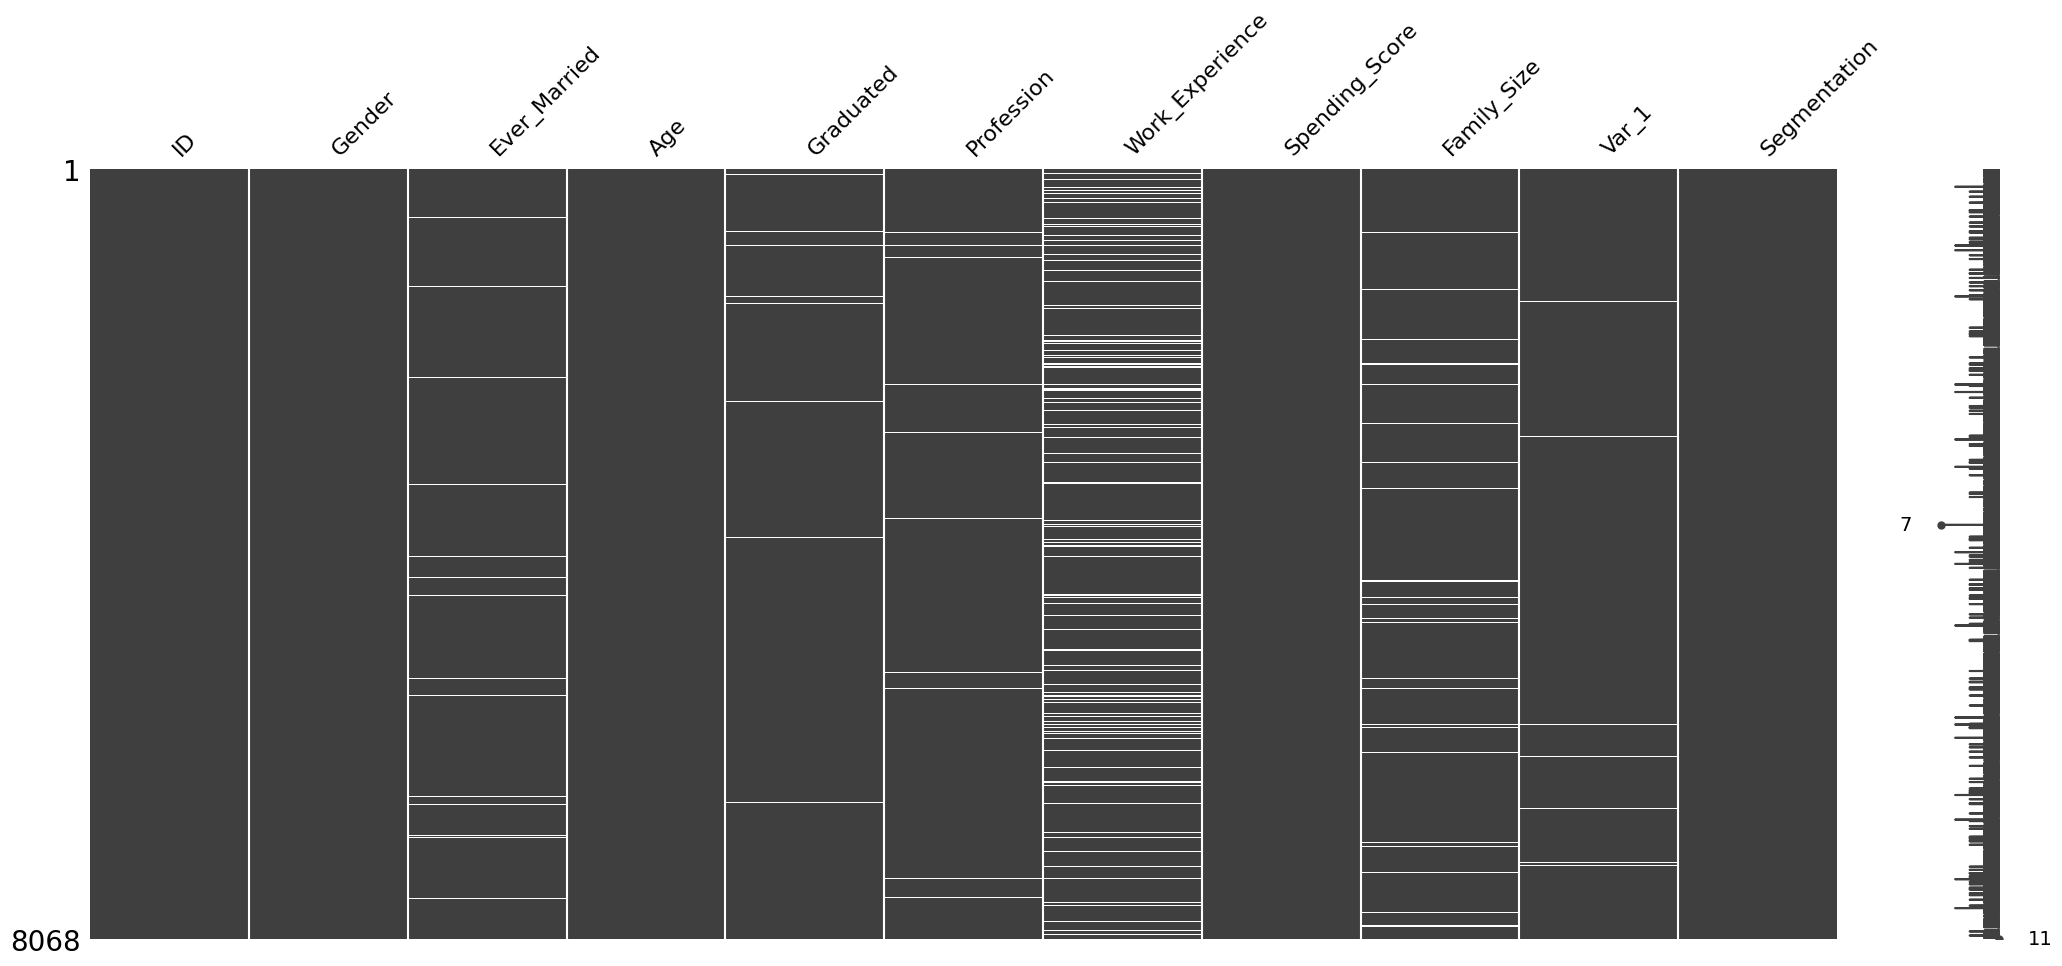

<Figure size 400x200 with 0 Axes>

In [ ]:
msno.matrix(df)
plt.figure(figsize=(4, 2))
plt.show()

Podemos ver que en varias columnas hay valores nulos.
En algunas podría ser una respuesta válida, tales como `'Work_Experience'`,`'Profession'` o `'Graduated'`. Pero en el resto de las variables me llama un poco la atención, y podríamos plantearnos reemplazar esos valores o eliminarlos.

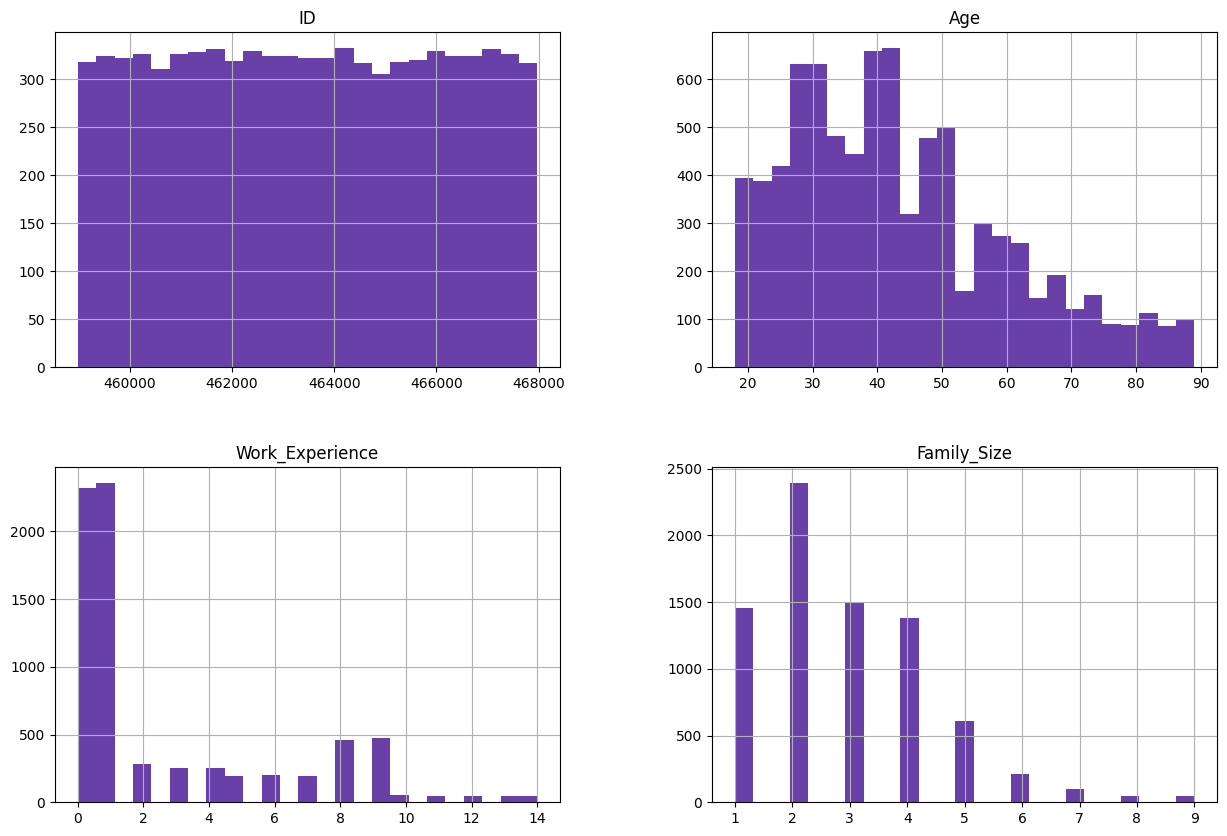

In [ ]:
df.hist(bins=25,figsize=(15,10),color='#6940A8') #Histograma de las variables numéricas
plt.show()

In [ ]:
segmentacion = df["Segmentation"].value_counts()

for segmento, cant in segmentacion.items():
    porcentaje = (cant / df.shape[0]) * 100
    print(f"Segmento {segmento}: Cantidad: {cant}, Porcentaje: {porcentaje:.2f}%")

Segmento D: Cantidad: 2268, Porcentaje: 28.11%
Segmento A: Cantidad: 1972, Porcentaje: 24.44%
Segmento C: Cantidad: 1970, Porcentaje: 24.42%
Segmento B: Cantidad: 1858, Porcentaje: 23.03%


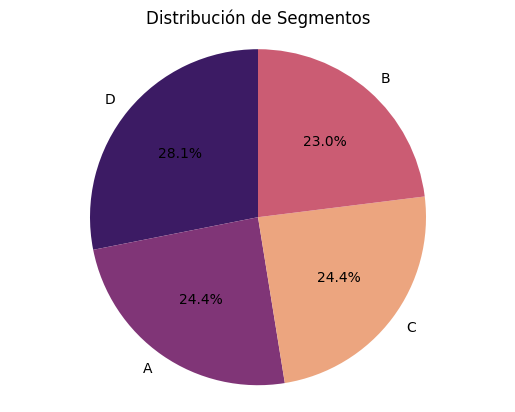

In [ ]:
# Crear gráfico de torta

# Contar los valores de cada segmento
segmentacion = df["Segmentation"].value_counts()

fig, ax = plt.subplots()
ax.pie(segmentacion, labels=segmentacion.index, autopct='%1.1f%%', startangle=90, colors=['#3c1b64', '#803577', '#eca57f', '#cb5c73'])

# Asegurar que el gráfico de torta es circular
ax.axis('equal')

plt.title('Distribución de Segmentos')
plt.show()

No existe una gran diferencia entre los segmentos, solo D tiene un 4% más que el resto, pero en términos de cantidades no resulta siendo una suma significativa. La variable objetivo está balanceada.

# 🧹Reformateo y Limpieza

Comenzamos dropeando la columna ID ya que no nos proporciona info útil.

Features y elementos a tratar:
1. Intentar mantener la mayor cantidad de datos, reemplazando nulos por valores más que eliminándolos.
2. Dropeamos duplicados y nulos, habiendo modificado los valores nulos de features específicas.
3. Hacer numérica la feature `'Var_1'`
4. Reformateo al tipo de dato correcto en columnas numéricas

In [ ]:
# Hacemos una función ya que al final, cuando usemos el dataset 'Test' tendremos que aplicarle la misma limpieza.

def Limpieza_datos(df):
  df = df.drop(['ID'], axis=1)

  #1 Intentar mantener la mayor cantidad de datos, reemplazando nulos por valores más que eliminándolos.
  df['Work_Experience'] = df['Work_Experience'].fillna(0)
  df['Ever_Married'] = df['Ever_Married'].fillna("No")
  df['Graduated'] = df['Graduated'].fillna("No")

  #2 Dropeamos duplicados y nulos, habiendo modificado los valores nulos de features específicas.
  df.drop_duplicates(inplace=True)
  df.dropna(inplace=True)

  #3 Hacer numérica la feature 'Var_1'
  df['Var_1'] = df['Var_1'].str.replace('Cat_', '').astype(int)

  #4 Reformateo al tipo de dato correcto en columnas numéricas
  df['Work_Experience'] = df['Work_Experience'].astype(int)
  df['Family_Size'] = df['Family_Size'].astype(int)
  return df

In [ ]:
df = Limpieza_datos(df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7062 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           7062 non-null   object
 1   Ever_Married     7062 non-null   object
 2   Age              7062 non-null   int64 
 3   Graduated        7062 non-null   object
 4   Profession       7062 non-null   object
 5   Work_Experience  7062 non-null   int64 
 6   Spending_Score   7062 non-null   object
 7   Family_Size      7062 non-null   int64 
 8   Var_1            7062 non-null   int64 
 9   Segmentation     7062 non-null   object
dtypes: int64(4), object(6)
memory usage: 606.9+ KB


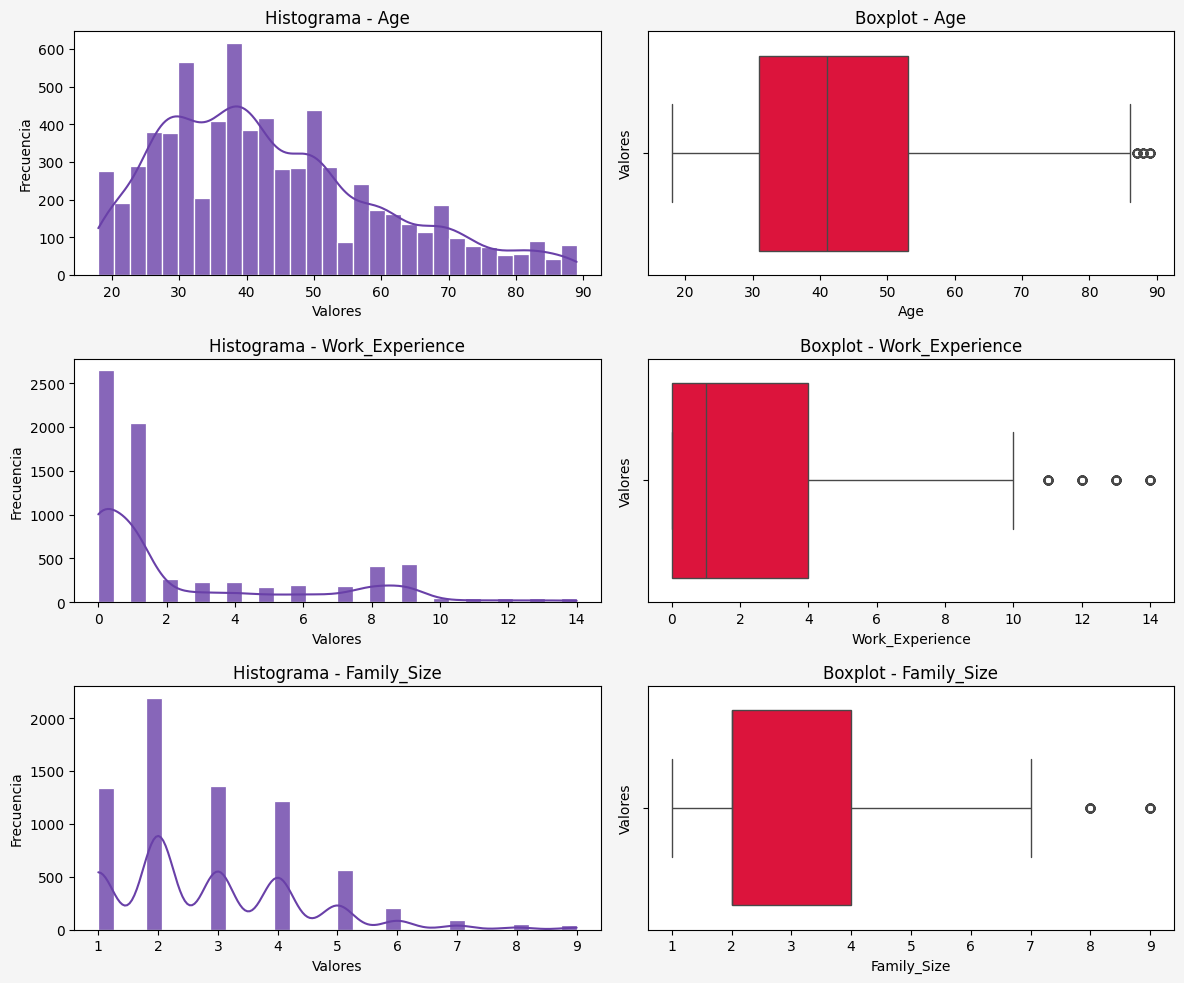

In [ ]:
# (Seleccionamos las columnas cuantitativas)
columnas_seleccionadas = ['Age', 'Work_Experience','Family_Size']

# Prepara una grilla de subplots con un gris claro
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,10), facecolor='whitesmoke')
sns.set_theme(style='darkgrid')
# Itera a través de las columnas seleccionadas y hace histogramas y boxplots
for i, columna in enumerate(columnas_seleccionadas): #Enumerate permite iterar en una lista, returneando una tupla que contiene el índice de cada elemento y el elemento mismo.
    # Histograma
    sns.histplot(df[columna], bins=30, color='#6940A8', alpha=0.8, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histograma - {columna}')
    axes[i, 0].set_xlabel('Valores')
    axes[i, 0].set_ylabel('Frecuencia')

    # Boxplot
    sns.boxplot(x=df[columna], ax=axes[i, 1], color='crimson', boxprops=dict(facecolor='crimson'))
    axes[i, 1].set_title(f'Boxplot - {columna}')
    axes[i, 1].set_ylabel('Valores')

# Ajustamos el espacio
plt.tight_layout()

# Muestra el gráfico
plt.show()

- Age se concentra entre 30 y 50
- Es normal que work experience tenga más cantidades en los valores más bajos, estos datos no deberían presentar problemas ya que es lo que se espera.
- El tamaño de la familia está perfectamente balanceado.

Ahora haremos un cálculo de los outliers presentes en estas columnas para tener un estimativo de las prociones que ocupan. Sin embargo, en los gráficos de arriba las variables no presentaban desbalanceos notorios o mala distribución, probablemente no tenganmos que eliminarlos.

In [ ]:

outliers = {}
for variable in columnas_seleccionadas:
    data = df.sort_values(by=variable)[variable]
    Q1, Q3 = data.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    inferior = Q1 - (1.5 * IQR)
    superior = Q3 + (1.5 * IQR)
    outliers[variable] = round((((data<(Q1 - 1.5 * IQR)) | (data>(Q3 + 1.5 * IQR))).sum()/data.shape[0])*100,2)
outliers

{'Age': 1.12, 'Work_Experience': 2.53, 'Family_Size': 1.32}

En un vistazo general de las variables, no se encontraron outliers significativos.

Las columnas seleccionadas hasta ahora parecen tener un buen balance y distribución.

Debido a este vistazo general, por ahora nada nos indica que tengamos que tratar con outliers. Por el momento, proseguiremos con el EDA.

#EDA Post-Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7062 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           7062 non-null   object
 1   Ever_Married     7062 non-null   object
 2   Age              7062 non-null   int64 
 3   Graduated        7062 non-null   object
 4   Profession       7062 non-null   object
 5   Work_Experience  7062 non-null   int64 
 6   Spending_Score   7062 non-null   object
 7   Family_Size      7062 non-null   int64 
 8   Var_1            7062 non-null   int64 
 9   Segmentation     7062 non-null   object
dtypes: int64(4), object(6)
memory usage: 606.9+ KB


Vistazo general luego de la limpieza:

- No hay nulos
- Tipos de variables correctos.
- 7062 filas en total
- No hay filas duplicadas.

## Análisis de columnas categóricas

Graficamos las columnas categóricas

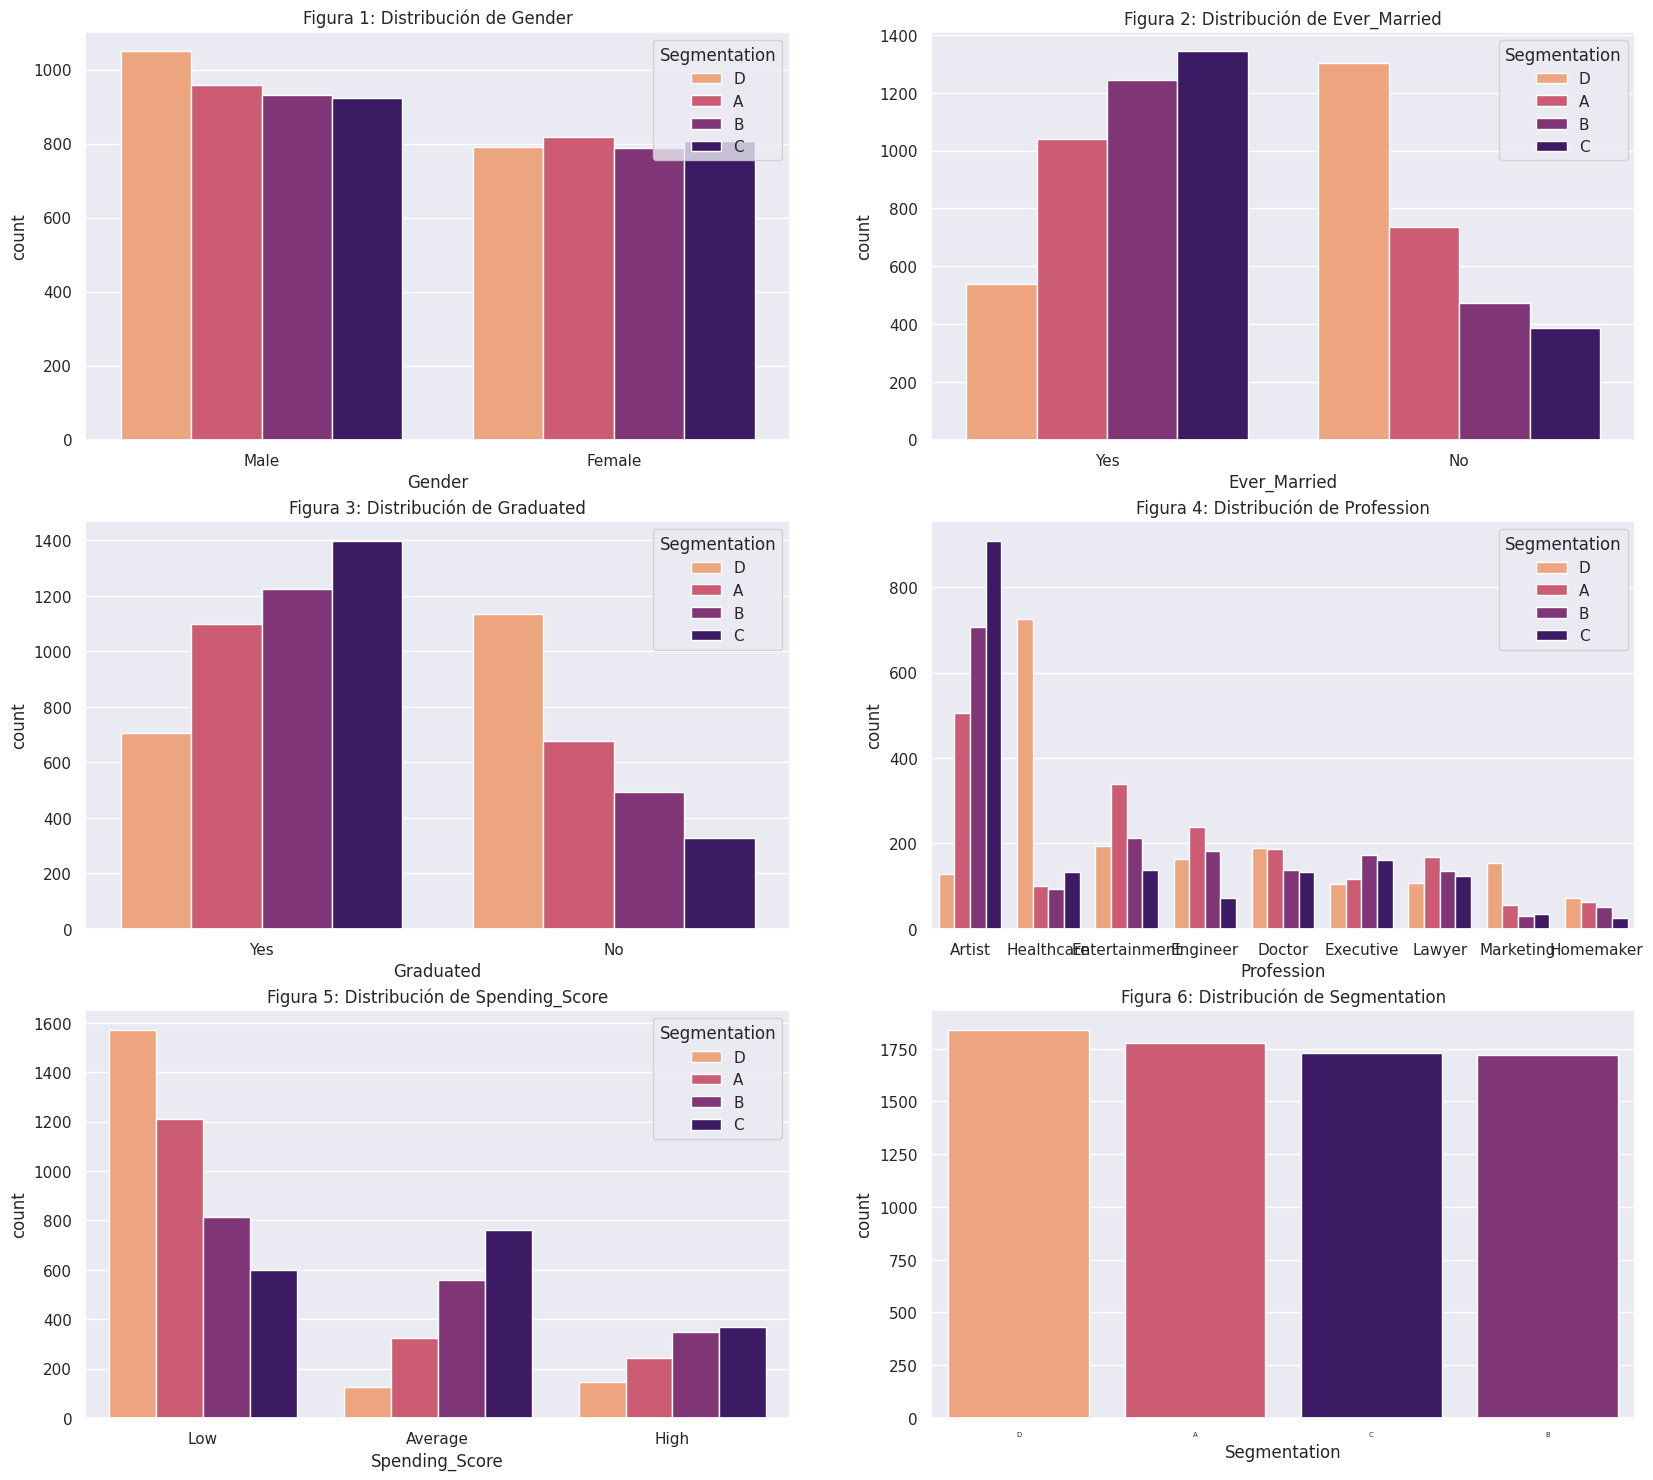

In [ ]:
variables = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score','Segmentation']

# Creación de grilla subplot 3x2
fig, ejes = plt.subplots(nrows=3, ncols=2, figsize=(20, 18))

# Flattenear los ejes para simplificar la visualización
ejes = ejes.flatten()

# Iteración sobre cada característica y crear un gráfico
for i, variable in enumerate(variables):
    #Ordenamos de forma descendente los valores para facilitar la visualización
    ordenar = df[variable].value_counts().index

    #Graficamos
    sns.countplot(df, x=variable, order=ordenar,hue='Segmentation', ax=ejes[i],palette='magma_r')
    # hue='Segmentation' para que nos muestre todo respecto a la variable objetivo

    #leyenda
    ejes[i].set_title(f'Figura {i+1}: Distribución de {variable}')

    # Achicamos los nombres para correcta visualizacion
    plt.tick_params(axis='x', labelsize= 5)



`Gender`: No se encontraron patrones específicos respecto al género. La muestra es levemente mayor con 'Male'.

`Ever_Married`: Primeras grandes diferencias:
- Segmentation D suele predominar para los que nunca se casaron
- Segmentation A, B y C, predominan para lo que se han casado, siendo C el que más.

Esto nos indica que los que nunca se han casado, generalmente se encuentran en el segmento D.

`Graduated`: Mismos patrones que con Segmentation.

Podemos decir que los No graduados predominan en el segmento D, mientras que los que sí, están en el A,B y C.

`Profession`: El primer segmento que salta a la vista es que gran parte de los trabajadores del segmento D, en proporción al resto, corresponden a 'Healthcare' y 'Marketing'. Son muy pocos los 'Artist' del segmento D.

- En 'Artist' predominan los egmentos B y C.
- En 'Entertainment' predomina el segmento A.

El resto de las clases está bastante balanceadas.

`Spending_Score`:
- El segmento A y D predomina en 'Low'
- El segmento B y C predomina en 'Average' y 'High'






## Análisis de columnas numéricas



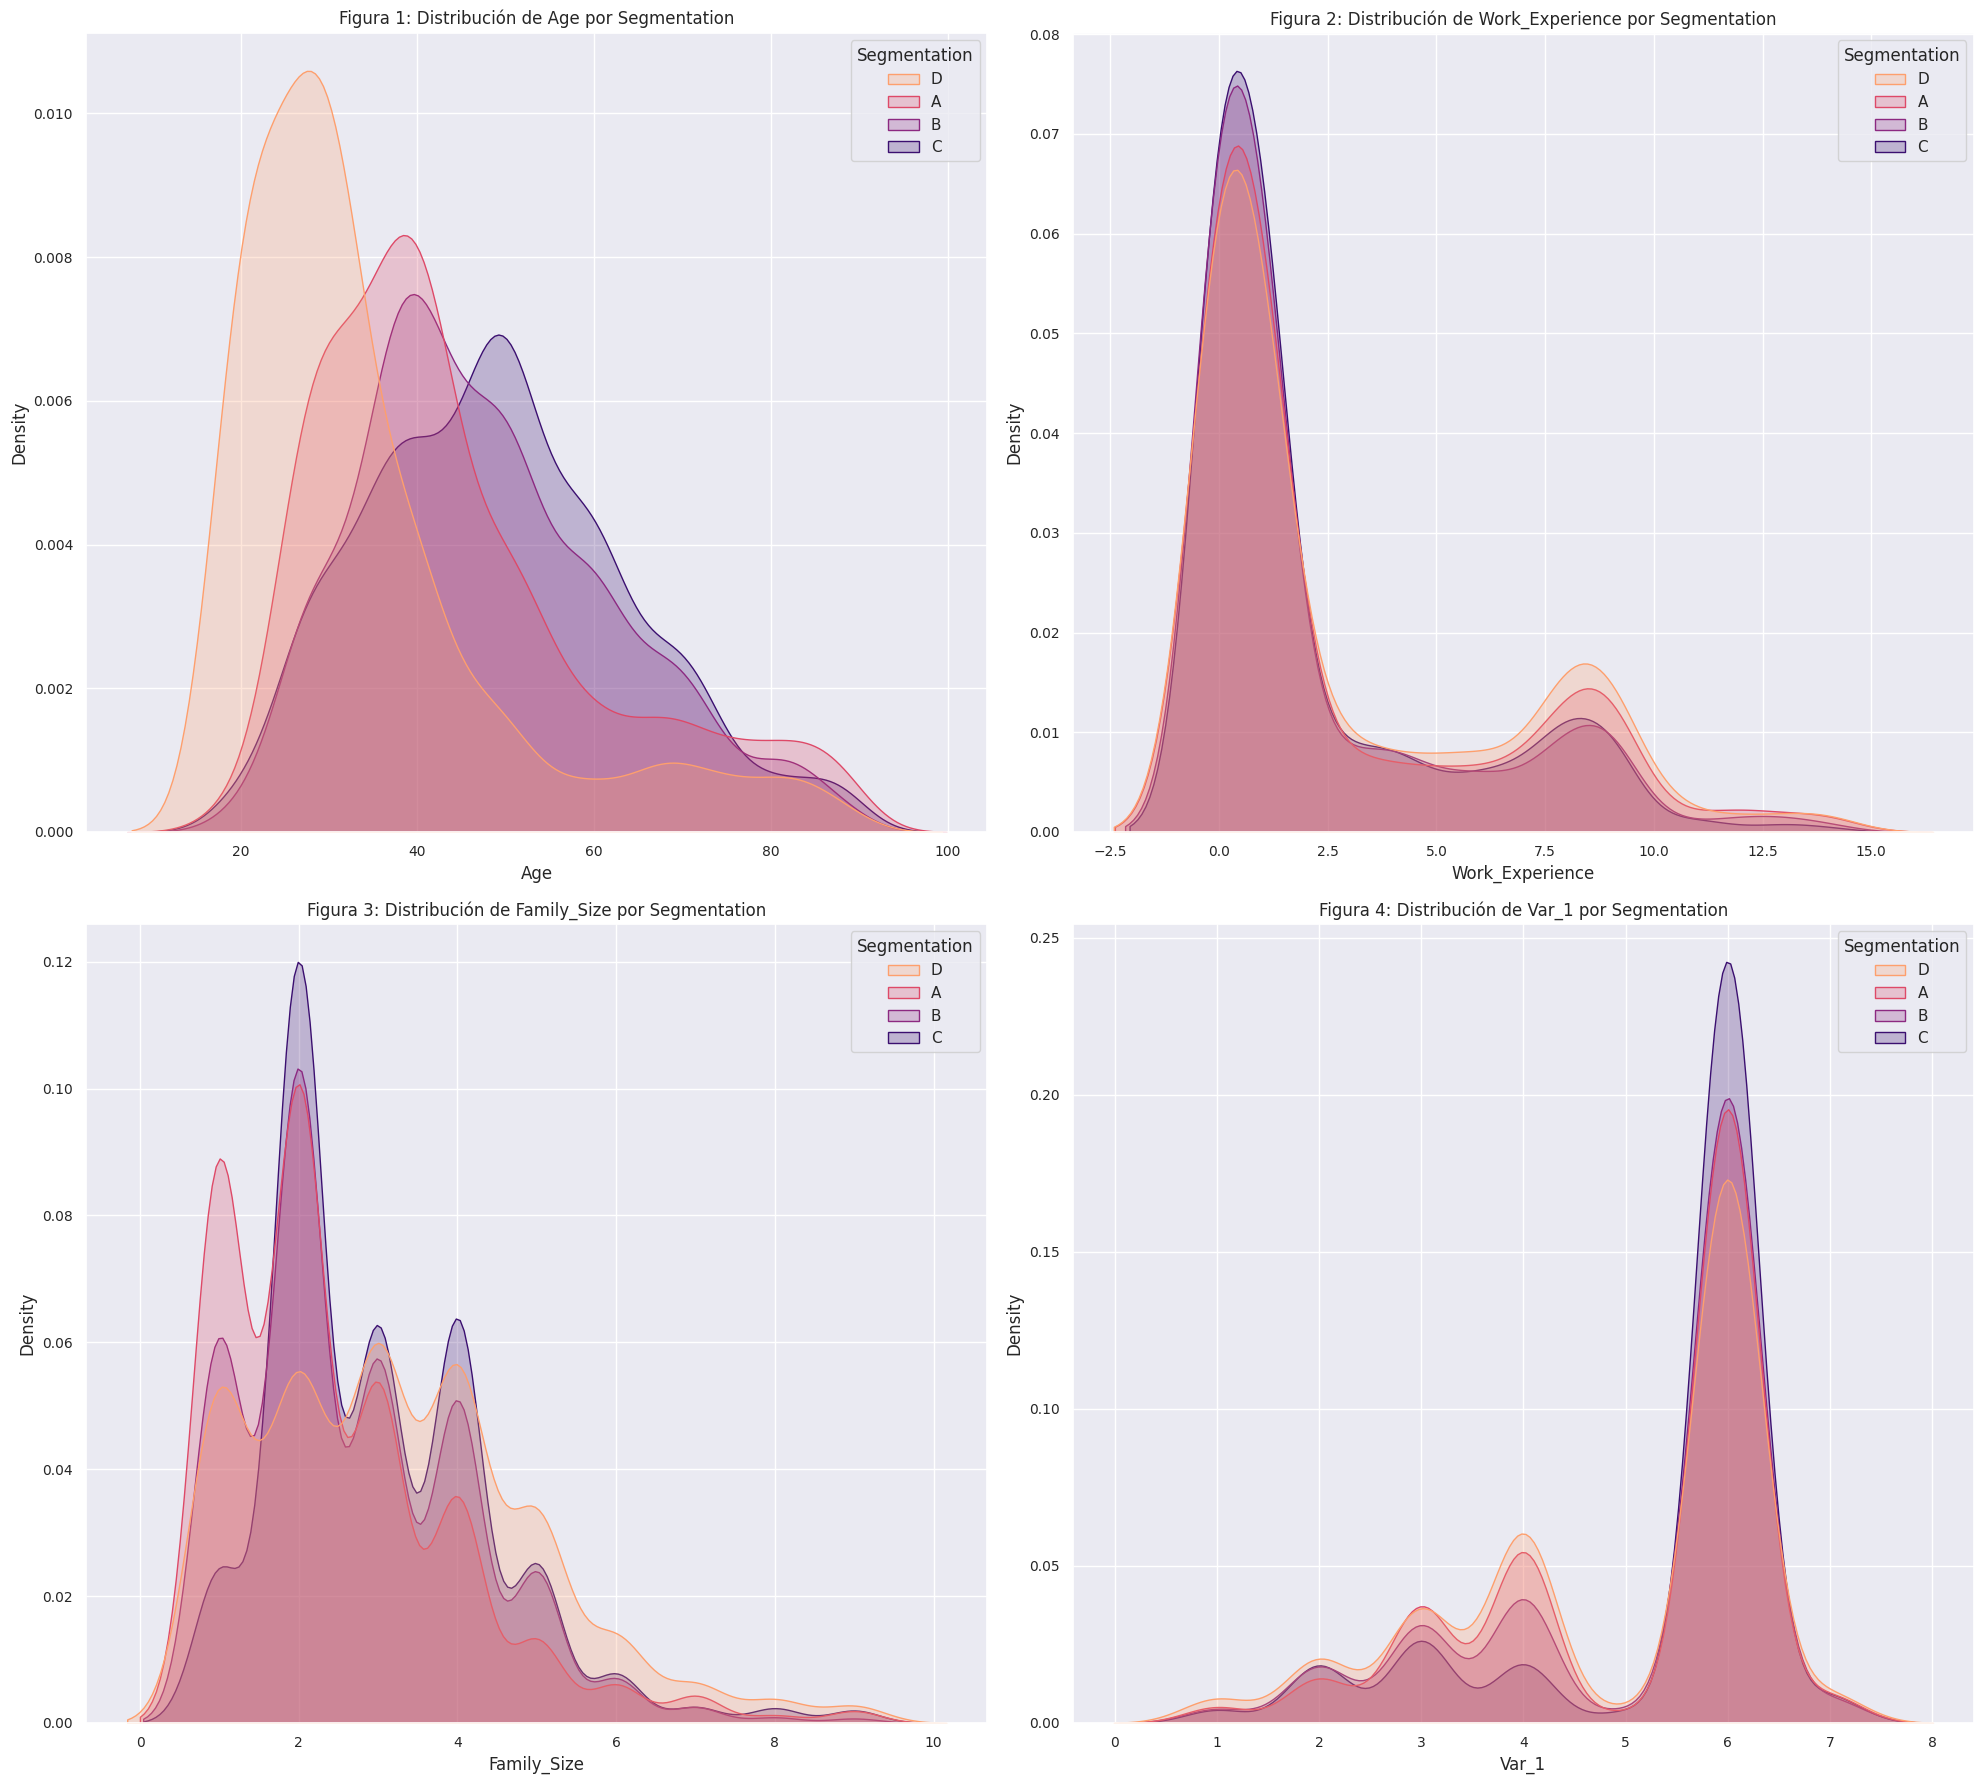

In [ ]:
variables_numericas = ['Age', 'Work_Experience', 'Family_Size', 'Var_1']

# Creación de grilla subplot 2x2 (4 variables)
fig, ejes = plt.subplots(nrows=2, ncols=2, figsize=(20, 18))

# Flattenear los ejes para simplificar la visualización
ejes = ejes.flatten()

# Iteración sobre cada característica y crear un gráfico
for i, variable in enumerate(variables_numericas):
    # Graficamos solo las líneas KDE
    sns.kdeplot(data=df, x=variable, hue='Segmentation', ax=ejes[i], palette='magma_r', fill=True)

    # Leyenda
    ejes[i].set_title(f'Figura {i+1}: Distribución de {variable} por Segmentation')

    # Ajustamos el tamaño de las etiquetas para correcta visualización
    ejes[i].tick_params(axis='x', labelsize=10)
    ejes[i].tick_params(axis='y', labelsize=10)

# Ajustar el diseño para que los subplots no se superpongan
plt.tight_layout()
plt.show()

`Age`: Probablemente la variable en la que más se note una diferencia entre segmentos.
- A predomina en edades medias y muy tardías(30 - 40 y 75 - 95)
- B y C no se diferencian tanto, predominan en (40 - 70) y (50 - 70)
- D predomina en edades más tempranas (20 - 30)
respectivamente.

`Work_Experience`: Segmentos conjuntos claros
- A y D predominan en en personas con mayor experiencia.
- B y C predominan en personjas con menor experiencia.

`Family_Size`:
- A predomina entre: (0 - 1)
- B no muestra una diferencia marcada en ningún rango, tiene más presencia entre: (0 - 2)
- C predomina entre: (2 - 4)
- D predomina entre (5 - 10)

`Var_1`: Esta varaible no podemos sacar ningún insight en sí ya que es un variable anónima, sin embargo vemos segmentos marcados en ella.
- A predomina en el rango (3 - 4)
- B y C predominan en el rango más alto (6+)
- D predomina en el rango (0 - 5)


Dicho esto, viendo las diferencias de distribución en los gráficos, probablemente las variables de las figuras 1 y 3 sean "más ricas" que podríamos utilizar luego para el modelo.

Por otro lado, las variables de las figuras 2 y 3 no presentan segmentos marcados claramente y podrían quedar en un segundo plano.

Por supuesto, todas estas son hipótesis y lo confirmaremos luego con una matriz de correlación respecto a nuestro variable objetivo.

#Feature Engineering

##Encoding

In [ ]:
#Reemplazamos todas las variables categoricas por valores numéricos enteros
#Aplicamos label encoder a cada columna categórica
# Nos guardamos la función, ya que igual que al inicio, precisaremos los mismos procedimientos para tratar el dataset 'test'

def encodear(df):
    # Inicializa el LabelEncoder
    lab = LabelEncoder()

    categoricas = df.select_dtypes(include=object).columns

    # Codificamos las columnas categoricas
    for col in categoricas:
        df[col] = lab.fit_transform(df[col])

    return df

In [ ]:
df = encodear(df)

In [ ]:
#Concatenamos las filas para tener nuestro df completamente numérico
dfLE = df.copy(deep=True)
#dfLE = df + "Label Encoder"
dfLE

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0,22,0,5,1,2,4,4,3
1,0,1,38,1,2,0,0,3,4,0
2,0,1,67,1,2,1,2,1,6,1
3,1,1,67,1,7,0,1,2,6,1
4,0,1,40,1,3,0,1,6,6,0
...,...,...,...,...,...,...,...,...,...,...
8061,1,1,65,0,0,0,0,2,6,2
8062,1,1,41,1,0,0,1,5,6,1
8064,1,0,35,0,4,3,2,4,4,3
8066,0,0,27,1,5,1,2,4,6,1


In [ ]:
Profession = df['Profession'].value_counts()
print(Profession)

Profession
0    2248
5    1054
3     882
2     658
1     648
4     555
7     533
8     273
6     211
Name: count, dtype: int64


Por lo tanto, a partir de ahora en la variable segmentación:
- A = 0
- B = 1
- C = 2
- D = 3

Profesiones:

*   0 Artista
*   1 Doctor/a
*   2 Ingeniero/a
*   3 Entretenimiento
*   4 Ejecutivo/a
*   5 Presional de la salud
*   6 Amo/a de casa
*   7 Abogado
*   8 Marketing


In [ ]:
def graficar_corr(df, objetivo): #(objetivo = variable objetivo)
    # Calculamos la matriz de corr para 'Segmentation'
    corr = df.corr(numeric_only=True)
    corr_objetivo = corr[objetivo].drop(objetivo)

    # Ordenamos las correlaciones de mayor a menor
    corr_objetivo_ordenada = corr_objetivo.sort_values(ascending=False)

    # Seleccionamos las variables con corr mayor a 0.1
    corr_objetivo_reducida = corr_objetivo_ordenada[abs(corr_objetivo_ordenada) >= 0.1]

    #
    sns.set(font_scale=0.8)
    sns.set_style("white")

    # Hacemos la matriz corr con la variable objetivo (Segmentation)
    sns.heatmap(corr_objetivo_reducida.to_frame(), cmap="RdGy", annot=True, fmt='.2f')
    plt.title(f'Correlación con {objetivo}')
    plt.show()

    # Returneamos el dataframe con las variables seleccionadas
    return corr_objetivo_reducida.index.tolist()


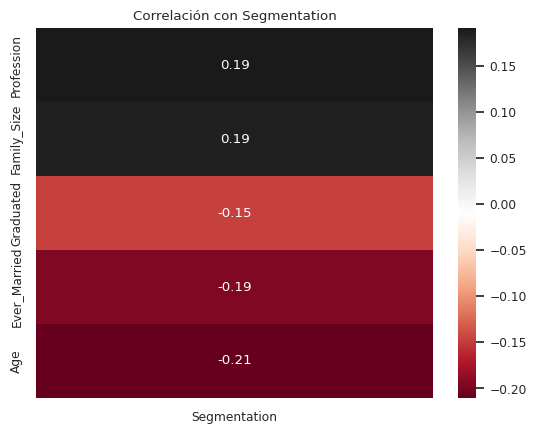

In [ ]:
corr_objetivo_reducida = graficar_corr(dfLE, 'Segmentation')


Correlaciones importantes para la variable objetivo:

Profession (0.19)

Family_Size (0.19)

Graduated (-0.15)

Ever_Married (-0.19)

Age (-0.21)

#PCA


El PCA es un método de reducción de dimensionalidad que busca mantener la mayor cantidad posible de varianza original.

Este, reduce el numero de variables en componentes principales, ordenados por la cantidad de varianza.

Con esta técnica, podremos comprender mejor los datos ya que nos da un gráfico más compacto de los datos sin perder información relevante.

PCA busca componentes ortogonales que maximizan la varianza, sin necesariamente ser independientes.



In [ ]:
class PCA_Analisis:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components_ = None

    def get_components(self):
        # Devuelve los componentes principales obtenidos tras aplicar PCA
        return self.components_

    #normalización
    def scaler(self, df):
        # Escala los valores en un rango de 0 a 1
        scaler = MinMaxScaler()
        return scaler.fit_transform(df)

    def metodo_dimension(self, df):
        # Método que utilizaremos para reducir la dimensionalidad
        # Como indicamos en el título de esta sección, utilizaremos PCA
        x = self.scaler(df)
        pca = PCA(n_components=self.n_components, random_state=0)
        x_reducido = pca.fit_transform(x)
        self.components_ = pca.components_
        return x_reducido

    def reduccion_dimension(self, df):
        # Función en la que reducimos el dataframe con el método indicado anteriormente
        x_reducido = self.metodo_dimension(df)
        df_comp = pd.DataFrame(x_reducido, columns=[f'PCA_{i}' for i in range(self.n_components)], index=df.index)
        return df_comp

    def graficar(self, pca, label, hue='Segmentation'):
        # Graficamos según el número de componentes definidos
        sns.set_style("whitegrid")
        if self.n_components == 3:
            # Gráfico 3D
            fig = plt.figure(figsize=(14, 8))
            ax = fig.add_subplot(111, projection='3d')
            scatter = ax.scatter(pca[f"{label}_0"], pca[f"{label}_1"], pca[f"{label}_2"], c=pca[hue], cmap='RdGy', s=100)
            ax.set_xlabel(f"{label} - Componente 1", fontsize=10)
            ax.set_ylabel(f"{label} - Componente 2", fontsize=10)
            ax.set_zlabel(f"{label} - Componente 3", fontsize=10)
            plt.title(f'{hue} con {label} (3D)', fontsize=20)
            fig.colorbar(scatter)

        elif self.n_components == 2:
            # Gráfico 2D
            plt.figure(figsize=(14, 8))
            sns.scatterplot(x=f"{label}_0", y=f"{label}_1", data=pca, hue=hue, alpha=0.7, s=100, palette='RdGy')
            plt.title(f'{hue} con {label} 2D', fontsize=20)
            plt.xlabel(f"{label} - Componente 1", fontsize=10)
            plt.ylabel(f"{label} - Componente 2", fontsize=10)
        plt.show()

In [ ]:
def EjecutarPCA(data):
  PCA = PCA_Analisis(n_components=3)
  #PCA = PCA_Analisis(n_components=2) #En caso de querer diferentes dimensiones editar esto.

  # Aplicamos la reducción de dimensionalidad al dataframe
  variables_PCA = PCA.reduccion_dimension(data)

  # Concatenamos las nuevas características reducidas con la columna 'Segmentation'
  variables_PCA = pd.concat([data['Segmentation'], variables_PCA], axis=1)

  PCA.graficar(variables_PCA, 'PCA')

  return variables_PCA #En caso de que se requiera el dataframe para fitearlo

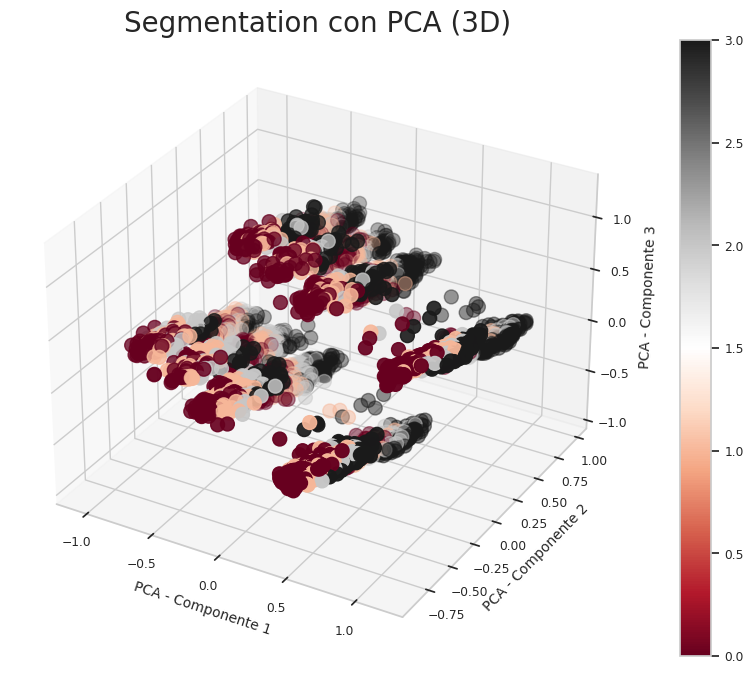

In [ ]:
data = dfLE.copy()

EjecutarPCA(data)

del data

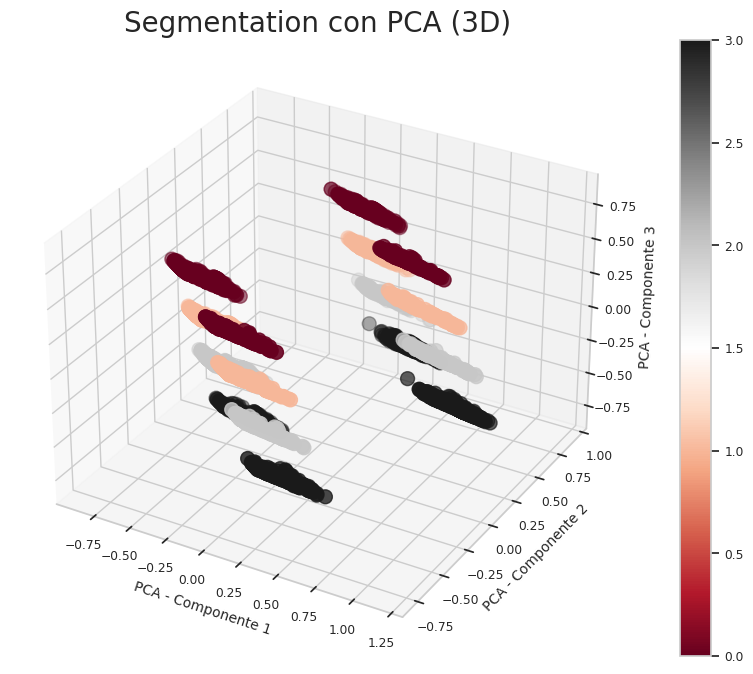

In [ ]:
# Filtramos el dataframe según las columnas seleccionadas y la variable objetivo
dfLE_filtrado = dfLE[corr_objetivo_reducida + ['Segmentation']]

# Creamos una copia del dataframe filtrado
data = dfLE_filtrado.copy()

train_pca = EjecutarPCA(data)
#Guardamos esta variable ya que nos servirá más adelante para trainear el modelo final con el que se evaluará el test

# Eliminamos la copia del dataframe para liberar memoria
del data

Los datos parecen mucho más ordenados y con diferencias más claras, sin embargo, si nuestro modelo aprende bien con este grupo de datos y después el test tiene una disposición y patrón diferente, habrá que buscar otra forma.

In [ ]:
df_pca = train_pca.copy(deep=True)
y = df_pca['Segmentation']
x = df_pca.drop(['Segmentation'],axis = 1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
def modelado(modelo, x_train, x_test, y_train, y_test):
    modelo.fit(x_train, y_train)
    y_pred = modelo.predict(x_test)

    # Métricas a analizar con cada modelo
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    return accuracy, precision, recall


In [ ]:
modelos = {
    'DecisionTreeC': DecisionTreeClassifier(),
    'GradientBoostingC': GradientBoostingClassifier(),
    'HistGradientBoostingC': HistGradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForestC': RandomForestClassifier(n_estimators=100),
    'XGBC': xgb.XGBClassifier(n_estimators=100, seed=27)
}

In [ ]:
def Evaluacion_Algoritmos(modelos, x_train, x_test, y_train, y_test):
  # Diccionario para almacenar los resultados del entrenamiento
  resultados = {'Algoritmo': [], 'Accuracy': [],'Precision': [], 'Recall': []}

  for nombre, modelo in modelos.items():
      # Utilizamos la función modelado para obtener métricas
      accuracy, precision, recall = modelado(modelo, x_train, x_test, y_train, y_test)

      # Convertimos las métricas a porcentaje y luego a cadena
      accuracy_str = f"{accuracy * 100:.2f}%"
      precision_str = f"{precision * 100:.2f}%"
      recall_str = f"{recall * 100:.2f}%"


      # Apendeamos los valores al diccionario de resultados
      resultados['Algoritmo'].append(nombre)
      resultados['Accuracy'].append(accuracy_str)
      resultados['Precision'].append(precision_str)
      resultados['Recall'].append(recall_str)

  # Returneamos los resultados
  return resultados

In [ ]:
df_resultados = Evaluacion_Algoritmos(modelos, x_train, x_test, y_train, y_test)
# Convertimos los resultados a un DataFrame ordenado para visualización
pd.DataFrame(df_resultados).sort_values(by='Accuracy',ascending=True)

,Algoritmo,Accuracy,Precision,Recall
3,K-Nearest Neighbors,100.00%,100.00%,100.00%
5,RandomForestC,100.00%,100.00%,100.00%
4,LogisticRegression,97.74%,97.77%,97.74%
1,GradientBoostingC,99.79%,99.79%,99.79%
0,DecisionTreeC,99.86%,99.86%,99.86%
2,HistGradientBoostingC,99.93%,99.93%,99.93%
6,XGBC,99.93%,99.93%,99.93%


Sin lugar a dudas un excelente rendimiento en el entrenamiento.

Decision tree, K-nearest y Random forest tuvieron un rendimiento **Perfecto**.

Probablemente haya que hacer validaciones. Intentemos aplicar este modelo en nuestro dataframe objetivo **test** para verificar como se comporta con el entrenamiento de este modelo. Si el resultado es positivo, realizaremos una validación cruzada para calcular la varianza de nuestro modelo.

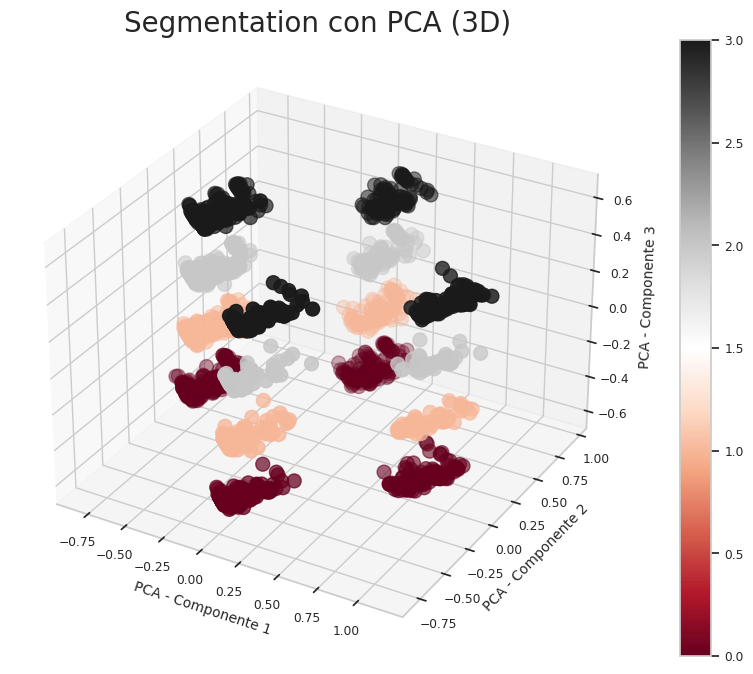

In [ ]:
test = Limpieza_datos(test)

test = encodear(test)
test_filtrado = test[corr_objetivo_reducida + ['Segmentation']]
# Hacemos el mismo procedimiento que en el training con el dataframe objetivo,
# Para que los dos tengan las mismas columnas, con pca aplicado y segmentation.

data = test_filtrado.copy()
test_pca = EjecutarPCA(data)

del data

No pinta muy bien, la disposición de los datos es completamente diferente. Sin embargo, aplicaremos el modelo a test para poder medir el accuracy de nuestro modelo y ver dónde estamos parados.

Usaremos los valores de train_pca (definida anteriormente al aplicar pca) para definir el set de datos a aplicar nuestro modelo ya entrenado

Haremos los mismo con test, dataframe descargado en importación.
Este dataframe fue dado para aplicar nuestro modelo y ver el accuracy, verificando cuan robusto es.

# Prueba con database 'Test'

Ahora que el modelo ya está entrenado, verificaremos su precisión con un set de datos que nunca haya visto.

Ahora que ya tenemos los train y los test hechos los asignamos a sus variables correspondientes.

- siendo x los componentes PCA del test y del train
- siendo y los ['Segmentation'] (variable objetivo) del test y del train

train: Conjunto de daos con el que fue entrenado el modleo
test: Conjunto de datos nunca antes visto por el modelo PERO filtrado de la misma forma que el train (PCA) para que tengan las mismas características


In [ ]:
# train (Conjunto de entrenamiento)

x_train = train_pca.drop(['Segmentation'],axis = 1).values
y_train = train_pca['Segmentation'].values

# train (Conjunto nunca antes visto por el modelo)
x_test = test_pca.drop(['Segmentation'], axis=1).values
y_test = test_pca['Segmentation'].values

In [ ]:
df_resultados = Evaluacion_Algoritmos(modelos, x_train, x_test, y_train, y_test)
# Convertimos los resultados a un DataFrame ordenado para visualización
pd.DataFrame(df_resultados).sort_values(by='Accuracy',ascending=False)

,Algoritmo,Accuracy,Precision,Recall
2,HistGradientBoostingC,11.63%,9.45%,11.63%
3,K-Nearest Neighbors,11.63%,9.64%,11.63%
4,LogisticRegression,11.63%,9.63%,11.63%
1,GradientBoostingC,11.59%,9.60%,11.59%
6,XGBC,11.59%,9.43%,11.59%
5,RandomForestC,11.51%,9.48%,11.51%
0,DecisionTreeC,11.47%,9.45%,11.47%


Como se puede ver, las primeras impresiones eran ciertas. La disposición de los datos era completamente diferente y el modelo actual no pudo discernir correctamente los datos en un dataframe nunca visto.

Considerando estos resultados (11.63% acc máxima), por razones obvias no haremos un cross validation y Probaremos otroa forma de reducción de dimensionalidad ya que el conjunto de datos parece ser demasiado complejo para este tipo de método.

# ICA

ICA, es una técnica de reducción de dimensionalidad en el que descomponemos los datos en componentes independientes, es decir, features que estadísticamente son independientes.

Utilizaremos este método para intentar reconocer patrones ya que parece ser que los datos son más complejos de lo que se esperaba en una primera instancia.

Diferencia con PCA: ICA busca componentes que sean estadísticamente independientes y puede identificar estructuras que PCA no puede.

Considerando esto, podría ser una buena opción.


## Definimos funciones

In [ ]:
class ICA_Analisis:
    def __init__(self, n_components):
        self.n_components = n_components
        # Definimos n_components para saber la cantidad de componentes a utilizar
        # y por lo tanto, las dimensiones de nuestro gráfico final
        self.mixing_ = None

    def get_mixing_matrix(self):
      # Devuelve la matriz de mezcla obtenida tras aplicar ICA.
      # Aunque no parece ser utilizada explícitamente, parece tener
      # un impacto en la consistencia del ajuste del modelo.
        return self.mixing_

    def scaler(self, df):
        # Escala los valores en un rango de 0 a 1
        scaler = MinMaxScaler()
        return scaler.fit_transform(df)

    def metodo_dimension(self, df):
        # Método que utilizaremos para reducir la dimensionalidad
        # Como indicamos en el título de esta sección, utilizaremos ICA
        x = self.scaler(df)
        ica = FastICA(n_components=self.n_components, whiten='unit-variance', random_state=0)
        x_reducido = ica.fit_transform(x)
        self.mixing_ = ica.mixing_
        return x_reducido

    def reduccion_dimension(self, df):
        # Funcion en la que reducimos el dataframe con el método indicado anteriormente
        x_reducido = self.metodo_dimension(df)
        #df_comp
        df_comp = pd.DataFrame(x_reducido, columns=[f'ICA_{i}' for i in range(self.n_components)], index=df.index)

        return df_comp

    # Graficamos | n_components = x defi
    def graficar(self, ica, label, hue='Segmentation'):
        # ponemos el n_comp == 3 antes porque yo quiero visualizarlo de esa forma
        sns.set_style("whitegrid")
        if self.n_components == 3:
            # Gráfico 3D
            fig = plt.figure(figsize=(14, 8))
            ax = fig.add_subplot(111, projection='3d')
            scatter = ax.scatter(ica[f"{label}_0"], ica[f"{label}_1"], ica[f"{label}_2"], c=ica[hue], cmap='RdGy', s=100)
            ax.set_xlabel(f"{label} - Componente 1", fontsize=10)
            ax.set_ylabel(f"{label} - Componente 2", fontsize=10)
            ax.set_zlabel(f"{label} - Componente 3", fontsize=10)
            plt.title(f'{hue} con {label} (3D)', fontsize=20)
            fig.colorbar(scatter)

#Dejo el elif para graficar con 2 componentes por si se quisiese visualizar
#se deberá modificar el inicio de la próxima celda de código:
#decomp = Decomp(n_components=2)

        elif self.n_components == 2:
        # Gráfico 2D
          plt.figure(figsize=(14, 8))
          sns.scatterplot(x=f"{label}_0", y=f"{label}_1", data=ica, hue=hue, alpha=0.7, s=100, palette='RdGy')
          plt.title(f'{hue} con {label} 2D', fontsize=20)
          plt.xlabel(f"{label} - Componente 1", fontsize=10)
          plt.ylabel(f"{label} - Componente 2", fontsize=10)
        plt.show()


In [ ]:
def EjecutarICA(data):
  ICA = ICA_Analisis(n_components=3) #En caso de querer diferentes dimensiones editar esto.

  # Aplicamos la reducción de dimensionalidad al dataframe
  variables_ICA = ICA.reduccion_dimension(data)

  # Concatenamos las nuevas características reducidas por ICA con la columna 'Segmentation'
  variables_ICA = pd.concat([data['Segmentation'], variables_ICA], axis=1)

  ICA.graficar(variables_ICA, 'ICA')

  return variables_ICA # Para aplicarle el modelo

##Aplicación ICA

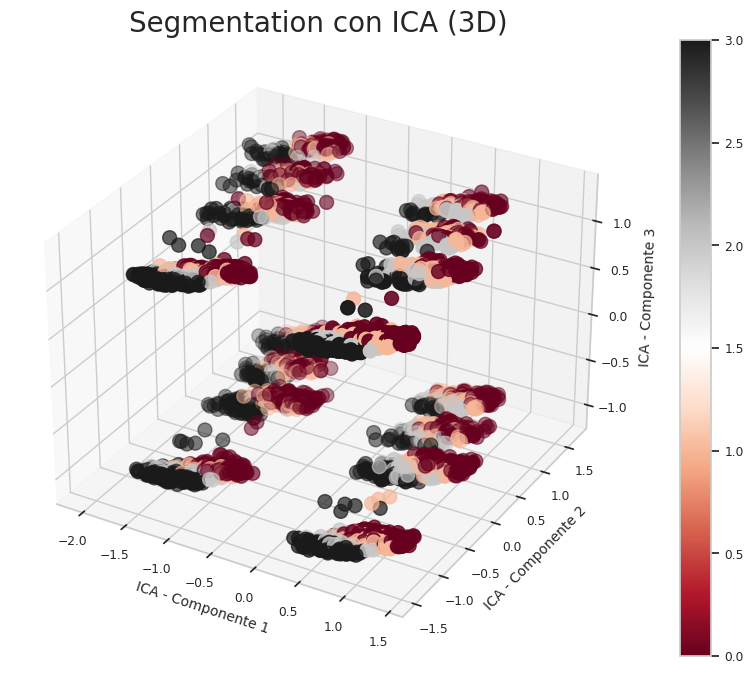

In [ ]:
data = dfLE.copy()

EjecutarICA(data)

del data

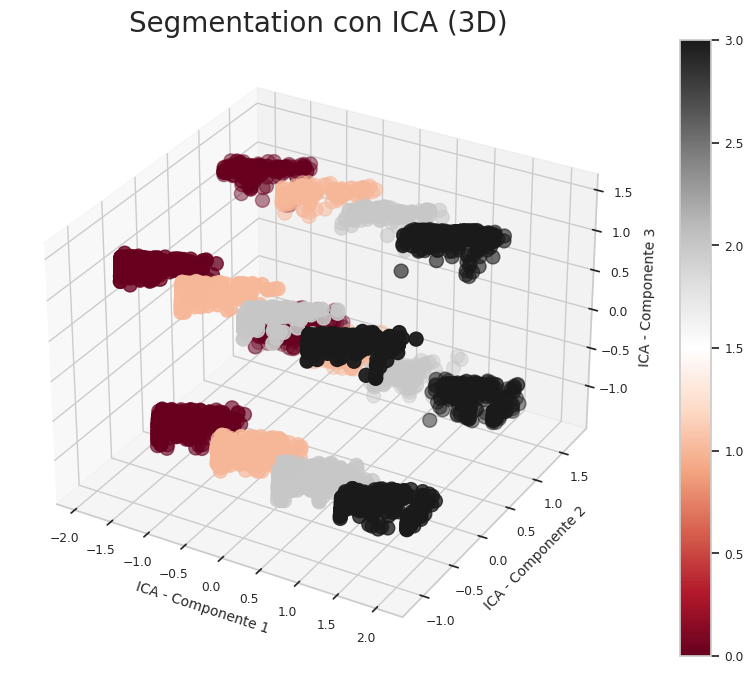

In [ ]:
# Creamos una copia del dataframe filtrado
data = dfLE_filtrado.copy()

# No indicamos el método ya que dentro de la clase lo hice con ICA
train_ica = EjecutarICA(data)
#Guardamos esta variable ya que nos servirá más adelante para trainear el modelo final con el que se evaluará el test

# Eliminamos la copia del dataframe para liberar memoria
del data

In [ ]:
train_ica

,Segmentation,ICA_0,ICA_1,ICA_2
0,3,1.112286,1.209705,1.104703
1,0,-1.107251,-0.616138,-0.617703
2,1,-0.312622,-0.725488,-0.874011
3,1,0.130781,-0.443139,-0.955999
4,0,-0.937947,-0.506921,-0.653764
...,...,...,...,...
8061,2,0.054514,1.130169,-1.021292
8062,1,-0.359201,-0.742547,-0.654629
8064,3,1.027561,1.151270,1.023747
8066,1,-0.248666,-0.675303,1.303294


##Modelado

In [ ]:
df_ica = train_ica.copy(deep=True)
y = df_ica['Segmentation']
x = df_ica.drop(['Segmentation'],axis = 1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.metrics import f1_score

def modelado(modelo, x_train, x_test, y_train, y_test):
    modelo.fit(x_train, y_train)
    y_pred = modelo.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    return accuracy, precision, recall, f1


In [ ]:
modelos = {
    'DecisionTreeC': DecisionTreeClassifier(),
    'GradientBoostingC': GradientBoostingClassifier(),
    'HistGradientBoostingC': HistGradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForestC': RandomForestClassifier(n_estimators=100),
    'XGBC': xgb.XGBClassifier(n_estimators=100, seed=27)
}

In [ ]:
def Evaluacion_Algoritmos(modelos, x_train, x_test, y_train, y_test):
  # Diccionario para almacenar los resultados del entrenamiento
  resultados = {'Algoritmo': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}

  for nombre, modelo in modelos.items():
      # Utilizamos la función modelado para obtener métricas
      accuracy, precision, recall, f1 = modelado(modelo, x_train, x_test, y_train, y_test)

      # Convertimos las métricas a porcentaje y luego a cadena
      accuracy_str = f"{accuracy * 100:.2f}%"
      precision_str = f"{precision * 100:.2f}%"
      recall_str = f"{recall * 100:.2f}%"
      f1_str = f"{f1 * 100:.2f}%"

      # Apendeamos los valores al diccionario de resultados
      resultados['Algoritmo'].append(nombre)
      resultados['Accuracy'].append(accuracy_str)
      resultados['Precision'].append(precision_str)
      resultados['Recall'].append(recall_str)
      resultados['F1-Score'].append(f1_str)
  # Returneamos los resultados
  return resultados

## Resultados

In [ ]:
df_resultados = Evaluacion_Algoritmos(modelos, x_train, x_test, y_train, y_test)
# Convertimos los resultados a un DataFrame ordenado para visualización
pd.DataFrame(df_resultados).sort_values(by='Accuracy',ascending=True)

,Algoritmo,Accuracy,Precision,Recall,F1-Score
1,GradientBoostingC,100.00%,100.00%,100.00%,100.00%
2,HistGradientBoostingC,100.00%,100.00%,100.00%,100.00%
3,K-Nearest Neighbors,100.00%,100.00%,100.00%,100.00%
5,RandomForestC,100.00%,100.00%,100.00%,100.00%
4,LogisticRegression,99.08%,99.08%,99.08%,99.08%
6,XGBC,99.86%,99.86%,99.86%,99.86%
0,DecisionTreeC,99.93%,99.93%,99.93%,99.93%


<Axes: >

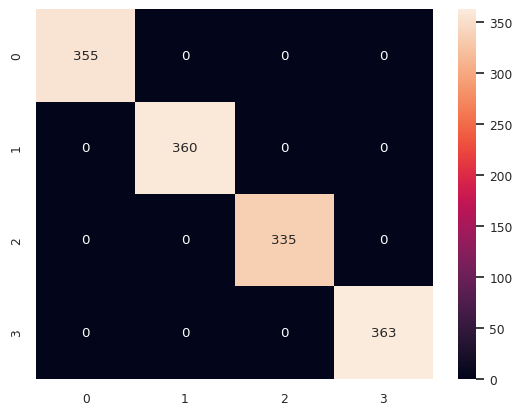

In [ ]:
modelo = RandomForestClassifier()
modelo.fit(x_train, y_train)
y_pred = modelo.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

# 2da Prueba con el objetivo

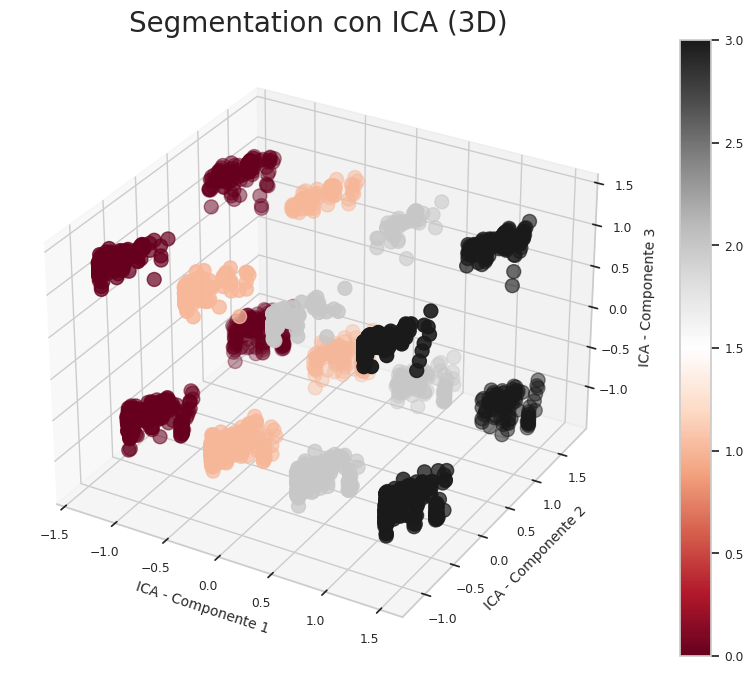

In [ ]:
#test = Limpieza_datos(test)

# Volemos a Utilizar el dataframe test_filtrado anteriormente hecho


data = test_filtrado.copy()
test_ica = EjecutarICA(data)

del data

Ahora la disposición de los datos coincide mucho más con los patrones que presentaba el train en un principio.

Ahora que ya tenemos nuevamente los train y los test hechos (con un método diferente de reducción de dimensionalidad) los asignamos a sus variables correspondientes.

- siendo x los componentes ICA del test y del train
- siendo y los ['Segmentation'] (variable objetivo) del test y del train

train: Conjunto de datos con el que fue entrenado el modelo
test: Conjunto de datos nunca antes visto por el modelo PERO filtrado de la misma forma que el train (ICA) para que tengan las mismas características


In [ ]:
train_ica.head(2)

,Segmentation,ICA_0,ICA_1,ICA_2
0,3,1.112286,1.209705,1.104703
1,0,-1.107251,-0.616138,-0.617703


In [ ]:
test_ica.head(2)

,Segmentation,ICA_0,ICA_1,ICA_2
0,1,-0.300754,-0.736160,-0.647716
1,0,-1.059642,-0.395079,-0.685168


In [ ]:
#Ahora que ya tenemos los train y los test hechos los asignamos a sus variables correspondientes
# siendo y los ['Segmentation'] (variable objetivo) del test y del train
# siendo x los componentes ICA del test y del train

x_train = train_ica.drop(['Segmentation'],axis = 1).values
y_train = train_ica['Segmentation'].values

x_test = test_ica.drop(['Segmentation'], axis=1).values
y_test = test_ica['Segmentation'].values

In [ ]:
df_resultados = Evaluacion_Algoritmos(modelos, x_train, x_test, y_train, y_test)
# Convertimos los resultados a un DataFrame ordenado para visualización
pd.DataFrame(df_resultados).sort_values(by='Accuracy',ascending=False)

,Algoritmo,Accuracy,Precision,Recall,F1-Score
1,GradientBoostingC,99.67%,99.67%,99.67%,99.67%
4,LogisticRegression,99.59%,99.59%,99.59%,99.59%
5,RandomForestC,97.72%,97.77%,97.72%,97.73%
6,XGBC,97.06%,97.12%,97.06%,97.05%
2,HistGradientBoostingC,96.36%,96.47%,96.36%,96.35%
3,K-Nearest Neighbors,94.83%,95.13%,94.83%,94.88%
0,DecisionTreeC,92.14%,91.92%,92.14%,91.90%


A diferencia de PCA, ICA resultó ser mucho mejor a la hora de generalizar y clasificar datos nunca antes visto. Considerando esto, podríamos decir que este modelo generaliza casi a la perfección con datos no vistos. SIn embargo, para asegurarnos, haremos una validación cruzada con el modelo con más accuracy.

In [ ]:
model = GradientBoostingClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Definir los folds
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)

# Evaluamosa usando K-Fold Cross-Validation

# Accuracy
scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.998 (0.001)


Como se hipotetizaba, el modelo terminó presentando una varianza bajísima (0.001), confirmando nuestras sospechas de que este modelo generaliza perfectamente y no tendrá problemas aplicandolo con datos nuevos.

<Axes: >

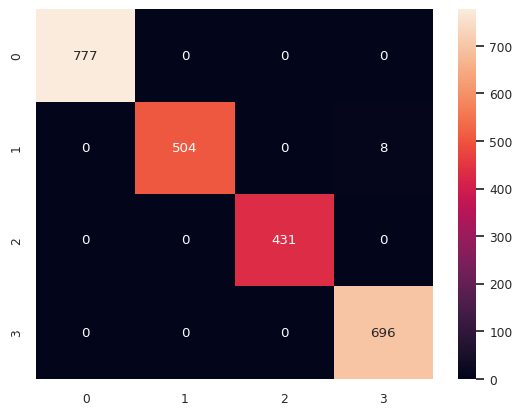

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

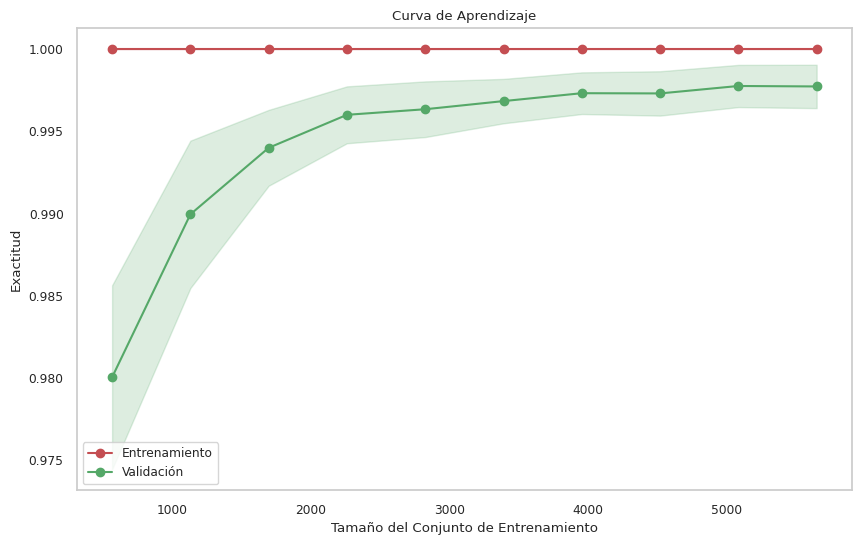

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

train_sizes, train_scores, val_scores = learning_curve(
    model, x, y, cv=cv, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculmos la media y desviación estándar de los score del train y valifación.
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Graficamos las curvas de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Entrenamiento')
plt.plot(train_sizes, val_mean, 'o-', color='g', label='Validación')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='r')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2, color='g')
plt.title('Curva de Aprendizaje')
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('Exactitud')
plt.legend(loc='best')
plt.grid()
plt.show()


Confirmamos que nuestro modelo no está overfiteado y generaliza con una precisión del 99,5% aprox. Esta y la validación cruzada dieron muy buenos resultados, más aún habiendo hecho las predicciones con 'test', dataset nunca antes visto por el modelo, por lo tanto, podemos comenzar con el tuning del modelo.

In [ ]:
params_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_depth': [3, 5, 7],
    'max_features': ['auto', 'sqrt', 'log2'],
    'subsample': [0.6, 0.8, 1.0],
    'criterion': ['friedman_mse', 'mse', 'mae']
}


halving_cv = HalvingRandomSearchCV(model, params_grid, scoring="accuracy", factor=3)
halving_cv.fit(x_train, y_train)

print("Mejores parametros", halving_cv.best_params_)
print("Mejor CV score", halving_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, halving_cv.predict(x_test)), 5)}')



Mejores parametros {'subsample': 0.8, 'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 7, 'learning_rate': 0.05, 'criterion': 'friedman_mse'}
Mejor CV score 0.9975275249489572
Accuracy del modelo = 0.99834


Ejecutamos varias veces el HalvingRandoomSearch, ya que al buscar parámetros de forma aleatoría, podría no llegar al mejor resultado en un primera instancia, ahora, haremos una prueba de accuracy con 5 combinaciones encontradas por el algoritmo y eligiremos el que tiene mayor precisión para el deployment.

In [116]:
# Lista de algunos de los mejores parámetros anteriores.
parametros = [
    {'subsample': 0.8, 'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2,
     'max_features': 'sqrt', 'max_depth': 7, 'learning_rate': 0.05, 'criterion': 'friedman_mse'},

    {'subsample': 0.8, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1,
     'max_features': 'sqrt', 'max_depth': 7, 'learning_rate': 0.1, 'criterion': 'friedman_mse'},

    {'subsample': 0.8, 'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4,
     'max_features': 'log2', 'max_depth': 7, 'learning_rate': 0.1, 'criterion': 'friedman_mse'},

    {'subsample': 0.8, 'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2,
     'max_features': 'sqrt', 'max_depth': 5, 'learning_rate': 0.2, 'criterion': 'friedman_mse'}
]

if halving_cv.best_params_ not in parametros:
    parametros.append(halving_cv.best_params_)

In [ ]:
mejor_modelo = None
mejor_accuracy = 0

for i, params in enumerate(parametros):
    print(f"Probando conjunto de parámetros {i+1}: {params}")

    # Crear el modelo con los parámetros actuales
    model = GradientBoostingClassifier(**params)

    # Entrenar el modelo
    model.fit(x_train, y_train)

    # Predecir sobre los datos de prueba
    y_pred = model.predict(x_test)

    # Calcular y mostrar la precisión
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy para conjunto de parámetros {i+1}: {accuracy}\n")
    if mejor_modelo is None or accuracy > mejor_accuracy:
        mejor_modelo = model
        mejor_accuracy = accuracy
        mejores_params = params
print("...............................................................")
print("Mejores parámetros:", mejores_params)
print("Mejor accuracy:", mejor_accuracy)

Probando conjunto de parámetros 1: {'subsample': 0.8, 'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 7, 'learning_rate': 0.05, 'criterion': 'friedman_mse'}
Accuracy para conjunto de parámetros 1: 1.0

Probando conjunto de parámetros 2: {'subsample': 0.8, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 7, 'learning_rate': 0.1, 'criterion': 'friedman_mse'}
Accuracy para conjunto de parámetros 2: 0.9966887417218543

Probando conjunto de parámetros 3: {'subsample': 0.8, 'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 7, 'learning_rate': 0.1, 'criterion': 'friedman_mse'}
Accuracy para conjunto de parámetros 3: 0.9995860927152318

Probando conjunto de parámetros 4: {'subsample': 0.8, 'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 5, 'learning_rate': 0.2, 'criterio

In [ ]:
# Ajusta el modelo
mejor_modelo.fit(x_train, y_train)

# Predice con el modelo ajustado
y_pred = mejor_modelo.predict(x_test)

accuracy_score(y_test, y_pred).round(5)

0.99917

<Axes: >

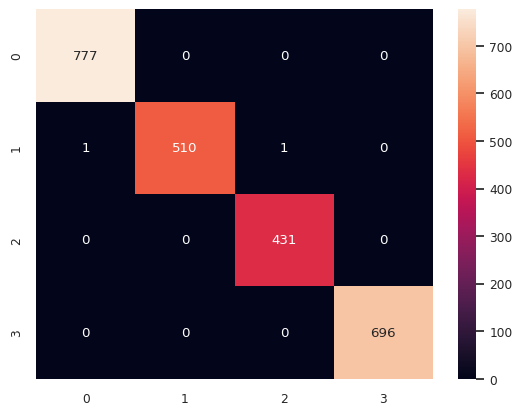

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

Sin lugar a dudas pudimos perfeccionarlo un poco más al modelo con el tuning. Utilizando el mejor modelo de todos los comparados anteriormente, pudimos llegar a tener un poco más de precisión, casi consiguiendo un modelo perfecto.

# Deployment futuros clientes


## Verificación funcionamiento deployment

Primero recordemos cuales eran las variables más importantes que utilizamos

In [ ]:
dfLE_filtrado

,Profession,Family_Size,Graduated,Ever_Married,Age,Segmentation
0,5,4,0,0,22,3
1,2,3,1,1,38,0
2,2,1,1,1,67,1
3,7,2,1,1,67,1
4,3,6,1,1,40,0
...,...,...,...,...,...,...
8061,0,2,0,1,65,2
8062,0,5,1,1,41,1
8064,4,4,0,0,35,3
8066,5,4,1,0,27,1


Hagamos una función más reducida para aplicar ICA ya que no necesitamos graficar como en un inicio, así que directamente haremos una función ICA_Reducido(), para llamar las funciones de la clase, pero evitando hacer uso de toda la clase.

In [ ]:
def ICA_Reducido(df, segmentation=True):

    ICA = ICA_Analisis(n_components=3)  # En caso de querer diferentes dimensiones editar esto

    # Aplicamos la reducción de dimensionalidad al dataframe
    variables_ICA = ICA.reduccion_dimension(df)

    if segmentation:
        # Concatenamos las nuevas características reducidas por ICA con la columna 'Segmentation'
        variables_ICA = pd.concat([df['Segmentation'], variables_ICA], axis=1)

    else:
      # Solo devolvemos las características reducidas por ICA
      variables_ICA = variables_ICA.reset_index(drop=True)

    return variables_ICA

Ahora que tenemos la función, primero verificaremos si de verdad nuestro modelo está segmentando correctamente, para esto, utilizaremos los 4 primeros valores de `dfLE_filtrado` para verificarlo.

Teniendo en cuenta el dataframe de arriba, los resultados deberán ser: **3,0,1,1**

In [ ]:
# Iterar sobre las últimas cuatro filas
data = dfLE_filtrado.head(4)

prueba = pd.concat([dfLE_filtrado, data], ignore_index=True)

prueba = ICA_Reducido(prueba, segmentation=True)

prueba = prueba.tail(4)

for i, fila in prueba.iterrows():
    # Necesitamos excluir la columna 'Segmentation' antes de predecir
    fila_sin_segmentacion = fila.drop('Segmentation')
    prediccion = modelo.predict([fila_sin_segmentacion])
    print(f"Predicción para la fila {i}: {prediccion}")

del data, prueba

Predicción para la fila 7062: [3]
Predicción para la fila 7063: [0]
Predicción para la fila 7064: [1]
Predicción para la fila 7065: [1]


Efectivamente, los resulrados fueron los esperados así que podríamos decir que este modelo con esta función, ya está listo para el deployment

## Aplicación deployment

La aplicación consiste en utilizar el modelo final para hacer una "modalidad práctica" y que pueda aplicarse en caso de que en un futuro se requieran ingresar datos manualmente o simplemente consultar en que segmento entraría un cliente con X características.

Haremos la función `Ingreso_Datos()` en caso de que se quieran ingresar los datos manualmente en la empresa. Sin embargo, para hacer un testing rápido, se agregó la función de poder generar un "cliente falso" con datos aleatorios para poder verificar la funcionalidad del deployment.

In [ ]:
def Ingreso_Datos():
  age = int(input("Ingrese la edad del cliente: "))
  while age < 18  or age > 100:
    age = int(input("Edad inválida, ingrese una edad válida: "))

  familia = int(input("Ingrese el tamaño de la familia: "))
  while familia < 1 or familia > 10:
    familia = int(input("Cantidad inválida, ingrese una edad válida: "))

  graduado = int(input("¿Se ha graduado? Si = 1, No = 0"))
  while graduado < 0 or graduado > 1:
    print("¿Se ha graduado?")
    print("Si = 1, No = 0")
    graduado = int(input("Valor inválido, ingrese una opción válida: "))

  print("0: Artista",
        "1: Doctor/a",
        "2: Ingeniero/a",
        "3: Entretenimiento",
        "4: Ejecutivo/a",
        "5: Profesional de la salud",
        "6: Amo/a de casa",
        "7: Abogado",
        "8: Marketing", sep="\n")

  profesion = int(input("Ingrese el número correspondiente a las profesiones mostradas: "))
  while profesion < 1 and profesion > 8:
    print("0: Artista",
        "1: Doctor/a",
        "2: Ingeniero/a",
        "3: Entretenimiento",
        "4: Ejecutivo/a",
        "5: Profesional de la salud",
        "6: Amo/a de casa",
        "7: Abogado",
        "8: Marketing", sep="\n")
    profesion = int(input("Profesión inválida, ingrese una profesión válida: "))

  casado = int(input("¿Se ha casado? Si = 1, No = 0: "))
  while casado < 0 or casado > 1:
    print("¿Se ha casado?")
    print("Si = 1, No = 0")
    casado = int(input("casado inválido, ingrese una opción válida: "))

  print("Muchas gracias por ingresar los datos, aguarde un momento por favor")
  return age,familia,graduado,profesion,casado

In [115]:
#Entering Xs

Entrada = str(input("¿Quiere hacer una segmentación con valores aleatorios? si / no: "))
while Entrada != "si" and Entrada != "no":
  print("¿Quiere hacer una segmentación con valores aleatorios? si / no")
  Entrada = str(input("Valor inválido, ingrese si o no: "))

if Entrada == "si":
  age = random.randint(18, 96)
  familia = random.randint(1, 10)
  graduado = random.randint(0, 1)
  profesion = random.randint(0, 8)
  casado = random.randint(0, 1)

else:
  age,familia,graduado,profesion,casado = Ingreso_Datos()

# Creamos el dataframe con los valores ingresados
Ingreso = pd.DataFrame({"Profession":[profesion], "Family_Size":[familia],"Graduated":[graduado],"Ever_Married":[casado],"Age":[age]})
print("Datos del cliente aleatorio:")
print(Ingreso)

#Juntamos los datos ya que el preprocesamiento sino no funcionaría
df_deploy = pd.concat([dfLE_filtrado, Ingreso], ignore_index=True)

# Dropeamos segmentation ya que no lo vamos a necesitar más
df_deploy = df_deploy.drop('Segmentation',axis=1)

# Aplicamos ICA | segmentation=False ya que no precisamos guardar más la columna.
df_deploy = ICA_Reducido(df_deploy,segmentation=False)

# Guardamos nuestros datos reducidos y predecimos
df_deploy = df_deploy.tail(1)
prediccion = model.predict(df_deploy)

# Mapeo de predicción a segmentos
segmentacion = ["A", "B", "C", "D"][prediccion[0]]

print("")
print(f"El segmento del cliente es: {segmentacion}.")


¿Quiere hacer una segmentación con valores aleatorios? si / no: si
Datos del cliente aleatorio:
   Profession  Family_Size  Graduated  Ever_Married  Age
0           3            6          0             0   57

El segmento predicho del cliente es: C.


# Referencias y bibliografía:



[The power of independent component analysis ica on real world applications egg example](https://towardsdatascience.com/the-power-of-independent-component-analysis-ica-on-real-world-applications-egg-example-48df336a1bd8)

[How ICA works](https://www.youtube.com/watch?v=QNjsOHbqlzw)

[Documentación FastICA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FastICA.html)

[A comparison of PCA, KPCA and ICA for dimensionality reduction in support vector machine](https://www.sciencedirect.com/science/article/abs/pii/S0925231203004338)

[13 técnicas de reducción de dimensionalidad](https://medium.com/@nicolasarrioja/13-t%C3%A9cnicas-de-reducci%C3%B3n-de-dimensionalidad-b33b2340a060:)